# Keras for newswires data 

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models, layers
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[-1]])

In [7]:
decoded_newswire

"? currency fluctuations may ? their influence on the bullion market in the near future bullion bankers samuel montagu and co ltd said in a market report but the firm said silver may lag behind gold in any reactions to movements on foreign exchanges opec's failure to address the recent decline in oil prices remains a worrying factor however and on balance it appears that the market should be approached cautiously montagu said the bank said the us economy has shown no ? long term improvement and that both latin american debt and the iranian arms affair could undermine confidence in the dollar reuter 3"

In [8]:
train_labels[-1]

25

## Data preprocessing 

In [9]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [14]:
x_val = x_train[:1000]
y_val = y_train[:1000]

x_train_part = x_train[1000:]
y_train_part = y_train[1000:]

## Building and training model 

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [13]:
model.compile(optimizer ='rmsprop', 
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

In [15]:
history = model.fit(x_train_part, y_train_part, 
                    epochs = 20, batch_size = 512, 
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 461us/step - loss: 2.5523 - accuracy: 0.5308 - val_loss: 1.7082 - val_accuracy: 0.6650
Epoch 2/20
7982/7982 [==============================] - 2s 215us/step - loss: 1.4021 - accuracy: 0.7092 - val_loss: 1.2974 - val_accuracy: 0.7050
Epoch 3/20
7982/7982 [==============================] - 2s 217us/step - loss: 1.0422 - accuracy: 0.7720 - val_loss: 1.1181 - val_accuracy: 0.7610
Epoch 4/20
7982/7982 [==============================] - 2s 256us/step - loss: 0.8234 - accuracy: 0.8188 - val_loss: 1.0206 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 2s 274us/step - loss: 0.6670 - accuracy: 0.8559 - val_loss: 0.9639 - val_accuracy: 0.7930
Epoch 6/20
7982/7982 [==============================] - 2s 215us/step - loss: 0.5360 - accuracy: 0.8870 - val_loss: 0.9232 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 162us/step - loss

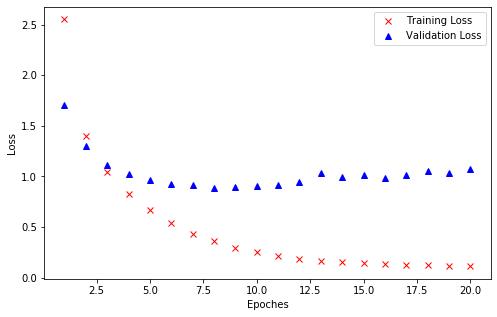

In [17]:
history_dict = history.history
epoches = range(1, 1 + 20)

loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

plt.figure(figsize = (8, 5))
plt.plot(epoches, loss_training, 'rx')
plt.plot(epoches, loss_validation, 'b^')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

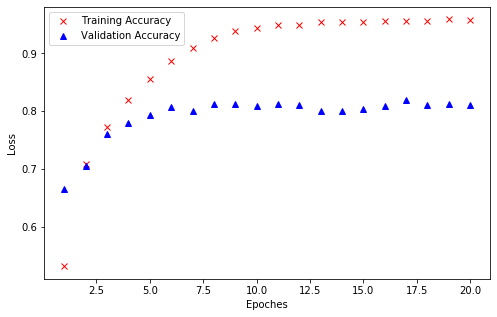

In [18]:
acc_training = history_dict['accuracy']
acc_validation = history_dict['val_accuracy']

plt.figure(figsize = (8, 5))
plt.plot(epoches, acc_training, 'rx')
plt.plot(epoches, acc_validation, 'b^')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

## Predicting 

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [20]:
model.compile(optimizer='rmsprop', 
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

In [21]:
model.fit(x_train_part, y_train_part, 
         epochs = 9, batch_size = 512, 
         validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 145us/step - loss: 2.6352 - accuracy: 0.5316 - val_loss: 1.7368 - val_accuracy: 0.6420
Epoch 2/9
7982/7982 [==============================] - 1s 139us/step - loss: 1.4060 - accuracy: 0.7078 - val_loss: 1.3108 - val_accuracy: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s 143us/step - loss: 1.0476 - accuracy: 0.7751 - val_loss: 1.1404 - val_accuracy: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.8334 - accuracy: 0.8211 - val_loss: 1.0629 - val_accuracy: 0.7660
Epoch 5/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.6661 - accuracy: 0.8576 - val_loss: 1.0070 - val_accuracy: 0.7820
Epoch 6/9
7982/7982 [==============================] - 1s 170us/step - loss: 0.5424 - accuracy: 0.8851 - val_loss: 0.9496 - val_accuracy: 0.8050
Epoch 7/9
7982/7982 [==============================] - 2s 244us/step - loss: 0.437

In [22]:
results

[0.9984806847168947, 0.7925200462341309]

In [23]:
confidence = model.predict(x_test)

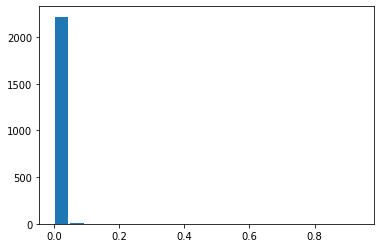

In [24]:
plt.hist(confidence[:, 6], bins = 20, rwidth = 0.9)
plt.show()